In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

In [40]:
# create data
nclust = 100
blur = 1
A = [1,3]
B = [1,-2]

#Generate random data
a = [A[0]+np.random.randn(nclust)*blur,A[1]+np.random.randn(nclust)*blur]
b = [B[0]+np.random.randn(nclust)*blur,B[1]+np.random.randn(nclust)*blur]

#true labels
labels_np = np.vstack((np.zeros((nclust,1)),np.ones((nclust,1))))

data_np = np.hstack((a,b)).T

#convert to pytorch
data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()

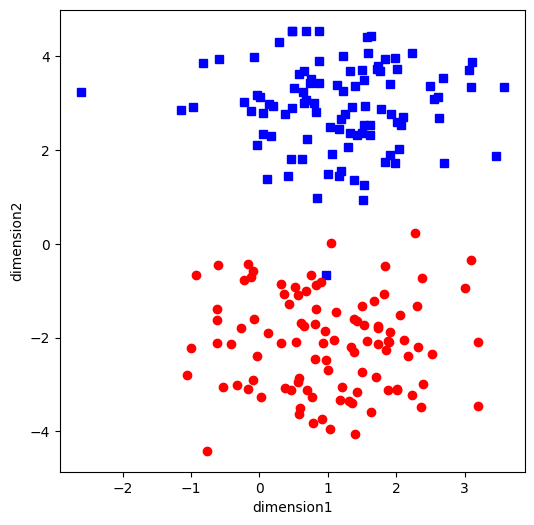

In [41]:
fig = plt.figure(figsize=(6,6))
plt.plot(data[np.where(labels==0)[0],0],data[np.where(labels==0)[0],1],"bs")
plt.plot(data[np.where(labels==1)[0],0],data[np.where(labels==1)[0],1],"ro")
plt.xlabel('dimension1')
plt.ylabel('dimension2')
plt.show()

In [42]:
def ANN_model(learning_rate):
  #model Architcture
  Ann_classify = nn.Sequential(
      nn.Linear(2,16),
      nn.ReLU(),
      nn.Linear(16,1),
      nn.ReLU(),
      nn.Linear(1,1),
      nn.Sigmoid()
  )
  lossfun = nn.BCELoss() #BCE with logit loss
# optimizer
  optimizer = torch.optim.SGD(Ann_classify.parameters(),lr=learning_rate)
  return Ann_classify,lossfun,optimizer

In [43]:
numepochs = 1000
def trainmodel(Ann_classify):
  losses = torch.zeros(numepochs)
  for ep in range(numepochs):
    y_hat = Ann_classify(data)
    loss = lossfun(y_hat,labels)
    losses[ep]=loss
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  predictions = Ann_classify(data)

  #computing predictions and reporting accuracy
  totalacc = 100*torch.mean(((predictions>0.5) == labels).float())
  return losses,predictions,totalacc




In [44]:
#testing the model

ANN_model(learning_rate=0.01)

(Sequential(
   (0): Linear(in_features=2, out_features=16, bias=True)
   (1): ReLU()
   (2): Linear(in_features=16, out_features=1, bias=True)
   (3): ReLU()
   (4): Linear(in_features=1, out_features=1, bias=True)
   (5): Sigmoid()
 ),
 BCELoss(),
 SGD (
 Parameter Group 0
     dampening: 0
     differentiable: False
     foreach: None
     fused: None
     lr: 0.01
     maximize: False
     momentum: 0
     nesterov: False
     weight_decay: 0
 ))

In [45]:
Ann_classify,lossfun,optimizer = ANN_model(learning_rate=0.01)
losses,predictions,totalacc = trainmodel(Ann_classify)


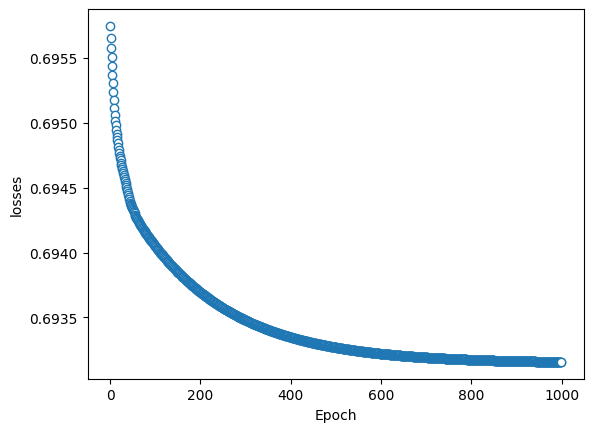

In [46]:
plt.plot(losses.detach(),'o',mfc="white",lw=0.1)
plt.xlabel("Epoch")
plt.ylabel("losses")
plt.show()